In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC


In [23]:

# import iris data  
X, y = datasets.load_iris(return_X_y = True)

X = X[:, :2] # we only take the first two features for visulization purpose

#clf = DecisionTreeClassifier(min_samples_split = 2);
#clf = KNeighborsClassifier(n_neighbors = 50);
clf = GaussianNB()

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
#C = 1.0 # SVM regularization parameter

# gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. 
# Higher the value of gamma, will try to exact fit the as per training data set 

# C: Penalty parameter C of the error term. 
# It also controls the trade off between smooth decision boundary and 
# classifying the training points correctly.

#clf = LinearSVC();
#clf = SVC(kernel='linear');
#clf = SVC(kernel='poly', degree=3);
#clf = SVC(kernel='rbf', C=1, gamma=1);

# Nonlinear kernel

# Try RBF kernel
# try to increase gamma from 1 to 10 to 100
# try to increase C from 1 to 100 to 1000
# try the sigmoid kernel !

# Fitting
clf.fit(X, y)

print (clf.score (X, y)); # print the trainig score (accuracy)


0.78


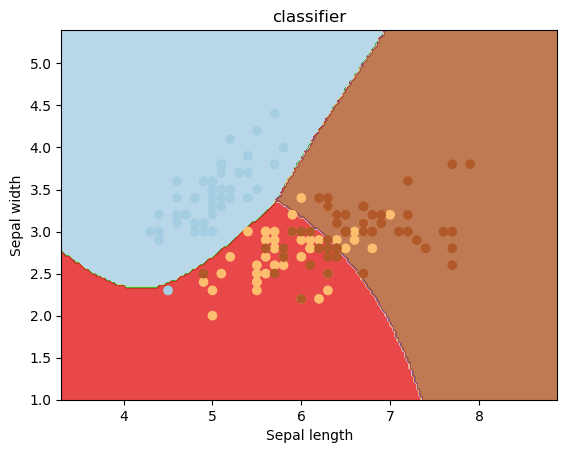

In [24]:

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
plt.subplot(1, 1, 1)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('classifier')
plt.show()


In [5]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

# Load the data
data_path = 'Final.csv'  # Adjust the file path
data = pd.read_csv(data_path)

# Assuming the first 200 columns are right margins and the next 200 are left margins
# Column names are expected to be like right_margin_1, right_margin_2, ..., left_margin_1, ..., left_margin_200

left_margin_columns = [f'Left_Margin_{i}' for i in range(1, 201)]
right_margin_columns = [f'Right_Margin_{i}' for i in range(1, 201)]

# Extract margin data
left_margins = data[left_margin_columns]
right_margins = data[right_margin_columns]

# Calculate features for right margins
features_right = {
    'mean_margin': right_margins.mean(axis=1),
    'std_margin': right_margins.std(axis=1),
    'min_margin': right_margins.min(axis=1),
    'max_margin': right_margins.max(axis=1),
    'median_margin': right_margins.median(axis=1),
    'skewness_margin': right_margins.apply(lambda x: skew(x), axis=1),
    'kurtosis_margin': right_margins.apply(lambda x: kurtosis(x), axis=1)
}

# Calculate features for left margins
features_left = {
    'mean_margin': left_margins.mean(axis=1),
    'std_margin': left_margins.std(axis=1),
    'min_margin': left_margins.min(axis=1),
    'max_margin': left_margins.max(axis=1),
    'median_margin': left_margins.median(axis=1),
    'skewness_margin': left_margins.apply(lambda x: skew(x), axis=1),
    'kurtosis_margin': left_margins.apply(lambda x: kurtosis(x), axis=1)
}

# Convert the features dictionaries to DataFrames
features_df_right = pd.DataFrame(features_right)
features_df_left = pd.DataFrame(features_left)

# Print the first few rows of the features to check
print("Features for Right Margins:")
print(features_df_right.head())
print("\nFeatures for Left Margins:")
print(features_df_left.head())

# Ensure there's a 'Gender' or 'Class' column in the 'data' DataFrame. Adjust 'Gender' if your label column is named differently.
class_labels = data['Gender']

# Combine the right and left margin features into a single DataFrame
combined_features_df = pd.concat([features_df_left, features_df_right], axis=1)

# Optionally, add a prefix to column names to distinguish between right and left margin features
combined_features_df.columns = ['Right_' + col if i < len(features_df_right.columns) else 'Left_' + col for i, col in enumerate(combined_features_df.columns)]

# Add the class label column to the combined DataFrame
combined_features_df['Class_Label'] = class_labels

# Save the combined DataFrame with class label to a CSV file
combined_features_df.to_csv('/path_to_save/margin_features_with_labels.csv', index=False)

# Print a confirmation
print("Combined margin features with class labels saved successfully to 'margin_features_with_labels.csv'.")

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_12860\3123379667.py:26: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'skewness_margin': right_margins.apply(lambda x: skew(x), axis=1),
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_12860\3123379667.py:27: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'kurtosis_margin': right_margins.apply(lambda x: kurtosis(x), axis=1)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_12860\3123379667.py:37: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'skewness_margin': left_margins.apply(lambda x: skew(x), axis=1),
C:\Users\Public\Documents\

Features for Right Margins:
   mean_margin  std_margin  min_margin  max_margin  median_margin  \
0      171.870  193.312783           5         576           79.0   
1      384.690  614.632107           1        1908           45.0   
2      265.790  346.045769           1        1384           60.0   
3      218.195  236.525407          54        1475           88.0   
4      103.450  129.478185           1        1026           47.0   

   skewness_margin  kurtosis_margin  
0         1.091646        -0.290697  
1         1.437159         0.598115  
2         1.362987         1.166572  
3         2.312129         5.783309  
4         2.496174        11.858442  

Features for Left Margins:
   mean_margin  std_margin  min_margin  max_margin  median_margin  \
0       113.58  206.817069           0        1809           80.0   
1       179.30  204.929379          53        1532          127.0   
2       311.45  303.244379          12        1071          209.5   
3       202.04  201.58641

In [7]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

# Load the data
data_path = 'Final.csv'  # Adjust the file path as necessary
data = pd.read_csv(data_path)

# Define the column names for the left and right margins
left_margin_columns = [f'Left_Margin_{i}' for i in range(1, 201)]
right_margin_columns = [f'Right_Margin_{i}' for i in range(1, 201)]

# Extract margin data
left_margins = data[left_margin_columns]
right_margins = data[right_margin_columns]

# Calculate features for right and left margins
def calculate_features(margins):
    return {
        'mean_margin': margins.mean(axis=1),
        'std_margin': margins.std(axis=1),
        'min_margin': margins.min(axis=1),
        'max_margin': margins.max(axis=1),
        'median_margin': margins.median(axis=1),
        'skewness_margin': margins.apply(lambda x: skew(x), axis=1),
        'kurtosis_margin': margins.apply(lambda x: kurtosis(x), axis=1)
    }

features_df_right = pd.DataFrame(calculate_features(right_margins))
features_df_left = pd.DataFrame(calculate_features(left_margins))

# Adding prefixes to column names for clarity
features_df_right = features_df_right.add_prefix('Right_')
features_df_left = features_df_left.add_prefix('Left_')

# Combine the right and left margin features into a single DataFrame
combined_features_df = pd.concat([features_df_left, features_df_right], axis=1)

# Ensure there's a 'Gender' or 'Class' column in the 'data' DataFrame.
# Adjust 'Gender' if your label column is named differently.
combined_features_df['Class_Label'] = data['Gender']

# Save the combined DataFrame with class label to a CSV file
combined_features_df.to_csv('margin_features_with_labels.csv', index=False)

# Print a confirmation
print("Combined margin features with class labels saved successfully to 'margin_features_with_labels.csv'.")


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_12860\4105495833.py:25: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'skewness_margin': margins.apply(lambda x: skew(x), axis=1),
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_12860\4105495833.py:26: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'kurtosis_margin': margins.apply(lambda x: kurtosis(x), axis=1)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_12860\4105495833.py:25: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'skewness_margin': margins.apply(lambda x: skew(x), axis=1),
C:\Users\Public\Documents\Wondershare\Creat

Combined margin features with class labels saved successfully to 'margin_features_with_labels.csv'.
